In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df1={'Name':['sachin','nischal','sittal','bibesh','roman',
                'puspanjali','upasana'],
                'Marks':[98,np.nan,99,87,np.nan,99,83],
                'Gender':['Male','Male','Male','Male','Male',
                         'Female','Female'],
                'Email':['sachin@gmail.com','nischal@gmail.com',
                        'sittal@gmail.com','bibesh@yahoo.com','roman@hotmail.com',
                         'puspanjali@yahoo.com', 'upasana@yahoo.com']
    }

In [10]:
df=pd.DataFrame(df1)

In [11]:
df

,Name,Marks,Gender,Email
0,sachin,98.0,Male,sachin@gmail.com
1,nischal,NaN,Male,nischal@gmail.com
2,sittal,99.0,Male,sittal@gmail.com
3,bibesh,87.0,Male,bibesh@yahoo.com
4,roman,NaN,Male,roman@hotmail.com
5,puspanjali,99.0,Female,puspanjali@yahoo.com
6,upasana,83.0,Female,upasana@yahoo.com


In [12]:
#finding the shape of the data
df.shape

(7, 4)

In [13]:
#finding the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    7 non-null      object 
 1   Marks   5 non-null      float64
 2   Gender  7 non-null      object 
 3   Email   7 non-null      object 
dtypes: float64(1), object(3)
memory usage: 352.0+ bytes


In [14]:
#finding the statictical measure of the data
df.describe()

,Marks
count,5.000000
mean,93.200000
std,7.628892
min,83.000000
25%,87.000000
50%,98.000000
75%,99.000000
max,99.000000


In [15]:
#checking the null value
df.isnull().sum()

Name      0
Marks     2
Gender    0
Email     0
dtype: int64

In [16]:
#finding the name of the columns
df.columns

Index(['Name', 'Marks', 'Gender', 'Email'], dtype='object')

In [18]:
#finding the unique value from the Gender column
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<AxesSubplot:>

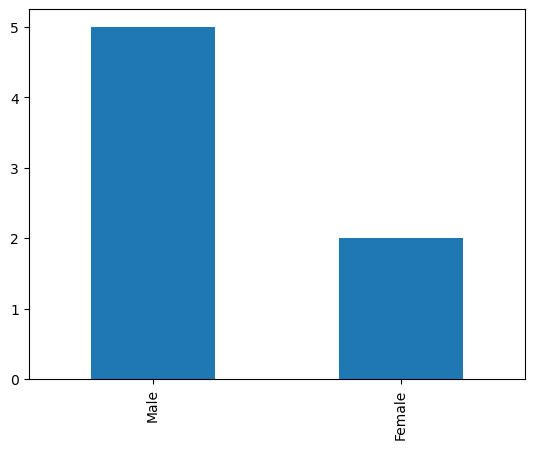

In [21]:
#display the count of unique value in gender column
df['Gender'].value_counts().plot(kind='bar')

In [24]:
#filling the null values with the mean of that columns
df['Marks'].fillna(df['Marks'].mean(),inplace=True)

In [25]:
df

,Name,Marks,Gender,Email
0,sachin,98.0,Male,sachin@gmail.com
1,nischal,93.2,Male,nischal@gmail.com
2,sittal,99.0,Male,sittal@gmail.com
3,bibesh,87.0,Male,bibesh@yahoo.com
4,roman,93.2,Male,roman@hotmail.com
5,puspanjali,99.0,Female,puspanjali@yahoo.com
6,upasana,83.0,Female,upasana@yahoo.com


In [30]:
#marks between 80 and 90
df[(df['Marks']>=80) & (df['Marks']<=90)]

,Name,Marks,Gender,Email
3,bibesh,87.0,Male,bibesh@yahoo.com
6,upasana,83.0,Female,upasana@yahoo.com


In [35]:
#name the student with lowest mark
df[df['Marks'].min()==df['Marks']]['Name']

6    upasana
Name: Name, dtype: object

In [38]:
#list the top 3 student according to their marks
df.nlargest(3,'Marks')

,Name,Marks,Gender,Email
2,sittal,99.0,Male,sittal@gmail.com
5,puspanjali,99.0,Female,puspanjali@yahoo.com
0,sachin,98.0,Male,sachin@gmail.com


In [46]:
#using map function
df['male_female']=df['Gender'].map({'Male':1,'Female':0})

In [48]:
df.drop(columns=['Gender'], inplace=True)

In [49]:
df

,Name,Marks,Email,male_female
0,sachin,98.0,sachin@gmail.com,1
1,nischal,93.2,nischal@gmail.com,1
2,sittal,99.0,sittal@gmail.com,1
3,bibesh,87.0,bibesh@yahoo.com,1
4,roman,93.2,roman@hotmail.com,1
5,puspanjali,99.0,puspanjali@yahoo.com,0
6,upasana,83.0,upasana@yahoo.com,0


In [52]:
#dispaly the name and marks of the female student
df[df['male_female']==0][['Name','Marks']]

,Name,Marks
5,puspanjali,99.0
6,upasana,83.0


In [54]:
#finding the highest average value as per gender
df.groupby('male_female')['Marks'].mean()

male_female
0    91.00
1    94.08
Name: Marks, dtype: float64

In [57]:
 popular_email= df['Email'].apply(lambda x:x.split('@')[1]).value_counts()

In [58]:
popular_email

gmail.com      3
yahoo.com      3
hotmail.com    1
Name: Email, dtype: int64